In [7]:
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
df=sns.load_dataset('tips')

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [12]:
df.corr()     #data between -1 to 1 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [13]:
df.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


In [17]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

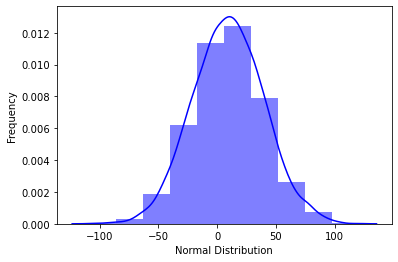

In [20]:
from scipy.stats import norm
normal_data=norm.rvs(size=9000,loc=10,scale=30)
axis=sns.distplot(normal_data,bins=10,kde=True,color='blue',
                 hist_kws={'linewidth':10,'alpha':0.5})
axis.set(xlabel='Normal Distribution',ylabel='Frequency')

In [14]:
import scipy.stats as stats

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
dataset=sns.load_dataset('tips')

In [5]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])

In [7]:
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [8]:
dataset_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [10]:
observe_values=dataset_table.values
print('Observed values : \n',observe_values)

Observed values : 
 [[60 97]
 [33 54]]


In [18]:
val=stats.chi2_contingency(dataset_table)

In [19]:
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [20]:
Expected_values=val[3]

In [21]:
Expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [24]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of freedom: ",ddof)
alpha=0.05

Degree of freedom:  1


In [27]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observe_values,Expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi square statistic:",chi_square_statistic)

chi square statistic: 0.001934818536627623


In [29]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print("p-value: ",p_value)
print("significant value: ",alpha)
print("Degree of freedom: ",ddof)

p-value:  0.964915107315732
significant value:  0.05
Degree of freedom:  1


In [31]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables.")
else:
    print("Retain H0,There is a relationship between 2 categorical variables.")

Retain H0,There is a relationship between 2 categorical variables.
